In [3]:
# What's up with people who voted LD in 2010 and UKIP in 2015?


In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from scipy import stats

In [5]:
%%time
# Load BES Panel for Wave 8
BES_Panel = pd.read_stata("../BES_analysis_data/BES2015_W8_v1.3.dta")
#(31409, 733)

# BES_Panel = pd.read_stata("../BES_analysis_data/BES2015_W8_v1.6.dta")

print( BES_Panel.shape )

(31409, 733)
Wall time: 13.9 s


In [6]:
a = BES_Panel.columns

In [7]:
[x for x in a if "vote" in x]

['voted2015',
 'voteMethodW9',
 'profile_past_vote_2005',
 'profile_past_vote_2010',
 'profile_past_vote_2015']

In [8]:
[x for x in a if "2015" in x]

['voted2015', 'profile_turnout_2015', 'profile_past_vote_2015']

In [9]:
nans = BES_Panel[['profile_past_vote_2010', 'profile_past_vote_2015']].isnull().any(axis=1)

In [10]:
vote_change = BES_Panel[['profile_past_vote_2010', 'profile_past_vote_2015']][~nans]
vote_change.columns = [ "2010","2015" ]

In [13]:
# vote_change['profile_past_vote_2010'].value_counts()

In [14]:
BES_Panel['profile_past_vote_2005'].loc[ld_minus_ukip].value_counts()

NameError: name 'ld_minus_ukip' is not defined

In [15]:
vote_change[ vote_change["2010"] == "British National Party (BNP)" ]["2015"].value_counts()

United Kingdom Independence Party (UKIP)    132
Conservative                                 26
Labour                                       21
Scottish National Party (SNP)                 6
Green Party                                   5
Don't know                                    4
Other                                         3
British National Party (BNP)                  2
Liberal Democrat                              1
Plaid Cymru                                   0
Name: 2015, dtype: int64

In [16]:
vote_change[ vote_change["2010"] == "United Kingdom Independence Party (UKIP)" ]["2015"].value_counts()

United Kingdom Independence Party (UKIP)    482
Conservative                                124
Labour                                       50
Other                                        19
Green Party                                  17
Liberal Democrat                             15
Scottish National Party (SNP)                 8
Don't know                                    7
Plaid Cymru                                   4
British National Party (BNP)                  1
Name: 2015, dtype: int64

In [18]:
vote_change[ vote_change["2010"] == "Liberal Democrats" ]["2015"].value_counts()

Labour                                      1435
Liberal Democrat                            1239
Conservative                                 700
Green Party                                  493
United Kingdom Independence Party (UKIP)     431
Scottish National Party (SNP)                243
Other                                         78
Plaid Cymru                                   48
Don't know                                    25
British National Party (BNP)                   6
Name: 2015, dtype: int64

In [19]:
ld_ukip = vote_change[ (vote_change["2010"] == "Liberal Democrats")
            & (vote_change["2015"] =="United Kingdom Independence Party (UKIP)") ].index

ld = vote_change[ (vote_change["2010"] == "Liberal Democrats") ].index

ld_minus_ukip = vote_change[ (vote_change["2010"] == "Liberal Democrats")
            & (vote_change["2015"] !="United Kingdom Independence Party (UKIP)") ].index

In [ ]:
BES_Panel.loc[ld_ukip].lr_scale.cat.codes.mean(), BES_Panel.loc[ld_minus_ukip].lr_scale.cat.codes.mean()

In [ ]:
BES_Panel.loc[ld_ukip].al_scale.cat.codes.mean(), BES_Panel.loc[ld_minus_ukip].al_scale.cat.codes.mean()

In [ ]:
and_stat = stats.anderson_ksamp( [ BES_Panel.loc[ld_ukip].al_scale.cat.codes.values,  BES_Panel.loc[ld].al_scale.cat.codes.values ] )

In [ ]:
and_stat

In [ ]:
and_stat.significance_level

In [ ]:
signif_array = pd.DataFrame(columns = [ "variable","significance" ])
overrun_errors = []
ind = 0
for col in BES_Panel.columns:
    if BES_Panel[col].dtypes.name =="category":
        if (BES_Panel.loc[ld_ukip][col].cat.codes.var()!=0.0)\
        & (BES_Panel.loc[ld][col].cat.codes.var()!=0.0):
            try:
                and_stat = stats.anderson_ksamp( [BES_Panel.loc[ld_ukip][col].cat.codes.values,
                                                  BES_Panel.loc[ld][col].cat.codes.values ] )
                signif_array.loc[ind] = [col, and_stat.significance_level ]
#                 signif_array.append( and_stat.significance_level )
            except:
                overrun_errors.append( col )
                print( ("****", col, "****" ) )
                signif_array.loc[ind] = [col, -1 ]
        else:
#             signif_array.append(99999999)
            signif_array.loc[ind] = [col, 99999999 ]
    ind = ind+1    
signif_array

In [ ]:
[x for x in BES_Panel if "personality" in x]

In [ ]:
BES_Panel.loc[ld_ukip,'personality_openness'].hist(bins=np.linspace(0,10,11))

In [ ]:
BES_Panel.loc[ld_minus_ukip,'personality_openness'].hist(bins=np.linspace(0,10,11))

In [ ]:
pd.DataFrame(signif_array_copy).apply(np.log10).hist(bins=100)

In [ ]:
significant_values = pd.DataFrame(signif_array_copy)[0].values<.05/600

In [ ]:
BES_Panel.columns[significant_values]

In [ ]:
BES_Panel.loc[ld_ukip,'al_scale'].value_counts().plot('bar')

In [ ]:
BES_Panel.loc[ld,'al_scale'].value_counts().plot('bar')

In [ ]:
BES_Panel.loc[ld_ukip,'workingStatus'].value_counts().plot('bar')

In [ ]:
BES_Panel.loc[ld,'workingStatus'].value_counts().plot('bar')

In [ ]:
col = 'tolUncertain3'
and_stat = stats.anderson_ksamp( [BES_Panel.loc[ld_ukip][col].cat.codes.values,
                                                  BES_Panel.loc[ld][col].cat.codes.values ] )

In [ ]:
and_stat

In [ ]:
BES_Panel.loc[ld_ukip,'antiIntellectual'].value_counts().plot('bar')

In [ ]:
BES_Panel.loc[ld,'antiIntellectual'].value_counts().plot('bar')

In [ ]:
BES_Panel.loc[ld,"age"].hist(bins=np.linspace(20,100,40))

In [ ]:
BES_Panel.loc[ld_ukip,"age"].hist(bins=np.linspace(20,100,40))

In [ ]:
BES_Panel.loc[ld,"euRefVote"].value_counts().plot('bar')


In [ ]:
BES_Panel.loc[ld_ukip,"euRefVote"].value_counts().plot('bar')

In [ ]:
overrun_errors

In [ ]:
BES_Panel.loc[ld].dtypes

In [ ]:
liberal_democats = BES_Panel[ BES_Panel.columns[ BES_Panel.dtypes =="category" ] ].apply(lambda x: x.cat.codes).loc[ld]
liberal_democats.replace(-1,np.nan, inplace=True)

In [ ]:
# %%time
# from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute
# X_filled_softimpute = SoftImpute().complete(liberal_democats)


In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clean_feature_set_std = StandardScaler().fit_transform(X_filled_softimpute)
BES_std = pd.DataFrame(clean_feature_set_std,
                       columns = liberal_democats.columns,
                       index   = liberal_democats.index)


In [ ]:
# y = X["euRefVoteW8"]==1
# X = X.drop("euRefVoteW8",axis=1)
# lda = LinearDiscriminantAnalysis(n_components=2)
# X_r2 = lda.fit(X, y).transform(X)
# print( (X_r.shape, X_r2.shape ) )

In [ ]:
# ['profile_past_vote_2010', 'profile_past_vote_2015']
lda = LinearDiscriminantAnalysis(n_components=2)
y = np.abs(BES_std['profile_past_vote_2015'].loc[ld]-1.299482)<0.1 # True for LD -> UKIP
X = BES_std.drop( ['profile_past_vote_2010', 'profile_past_vote_2015'],axis=1  )
X_r2 = lda.fit(X, y).transform(X)
print( X_r2.shape )

In [ ]:
# colors = ['navy', 'turquoise', 'darkorange']
# target_names = ["LD -> not ukip", "LD -> ukip"]
# plt.figure()
# for color, i, target_name in zip(colors, [0, 1], target_names):
#     plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
#                 label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('LDA of IRIS dataset')

# plt.show()

In [ ]:
pd.DataFrame(lda.coef_.transpose(), index = X.columns ).sort_values(by=0)

In [ ]:
# UKIP2015: less people in cities ukip
# Not UKIP2015: more people in cities

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
col = 'education'
fig.suptitle(col, fontsize=16)
BES_Panel.loc[ld_ukip,col].value_counts().plot('bar', ax=axes[0], title = "LD2010->UKIP2015")
BES_Panel.loc[ld_minus_ukip,col].value_counts().plot('bar', ax=axes[1], title = "LD2010->NotUKIP2015")

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
col = 'profile_gross_personal'
fig.suptitle(col, fontsize=16)
BES_Panel.loc[ld_ukip,col].value_counts().sort_index().plot('bar', ax=axes[0], title = "LD2010->UKIP2015")
BES_Panel.loc[ld_minus_ukip,col].value_counts().sort_index().plot('bar', ax=axes[1], title = "LD2010->NotUKIP2015")

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
col = 'ns_sec'
fig.suptitle(col, fontsize=16)
BES_Panel.loc[ld_ukip,col].value_counts().plot('bar', ax=axes[0], title = "LD2010->UKIP2015")
BES_Panel.loc[ld_minus_ukip,col].value_counts().plot('bar', ax=axes[1], title = "LD2010->NotUKIP2015")

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
col = 'profile_newspaper_readership_201'
fig.suptitle(col, fontsize=16)
BES_Panel.loc[ld_ukip,col].value_counts().plot('bar', ax=axes[0], title = "LD2010->UKIP2015")
BES_Panel.loc[ld_minus_ukip,col].value_counts().plot('bar', ax=axes[1], title = "LD2010->NotUKIP2015")

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
col = 'lr_scale'
fig.suptitle(col, fontsize=16)
BES_Panel.loc[ld_ukip,col].value_counts().sort_index().plot('bar', ax=axes[0], title = "LD2010->UKIP2015")
BES_Panel.loc[ld_minus_ukip,col].value_counts().sort_index().plot('bar', ax=axes[1], title = "LD2010->NotUKIP2015")

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
col = 'al_scale'
fig.suptitle(col, fontsize=16)
BES_Panel.loc[ld_ukip,col].value_counts().sort_index().plot('bar', ax=axes[0], title = "LD2010->UKIP2015")
BES_Panel.loc[ld_minus_ukip,col].value_counts().sort_index().plot('bar', ax=axes[1], title = "LD2010->NotUKIP2015")

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(30,10))
col = 'age'
fig.suptitle(col, fontsize=16)
BES_Panel.loc[ld_ukip,col].value_counts().sort_index().astype('int').plot('bar', ax=axes[0], title = "LD2010->UKIP2015")
BES_Panel.loc[ld_minus_ukip,col].value_counts().sort_index().plot('bar', ax=axes[1], title = "LD2010->NotUKIP2015")

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
col = 'profile_past_vote_2005'
fig.suptitle(col, fontsize=16)
BES_Panel.loc[ld_ukip,col].value_counts().sort_index().astype('int').plot('bar', ax=axes[0], title = "LD2010->UKIP2015")
BES_Panel.loc[ld_minus_ukip,col].value_counts().sort_index().plot('bar', ax=axes[1], title = "LD2010->NotUKIP2015")

In [ ]:
# Create a dataset of 2010 libdems
# modify variable to be UKIP/NOT UKIP in 2015
# 'profile_past_vote_2015' == 5 is ukip

In [20]:
liberal_democats = BES_Panel[ BES_Panel.columns[ BES_Panel.dtypes =="category" ] ].apply(lambda x: x.cat.codes).loc[ld]

In [21]:
liberal_democats = liberal_democats.drop(['profile_past_vote_2010'], axis=1)

In [22]:
liberal_democats['LDUKIP2015'] = (liberal_democats['profile_past_vote_2015'].loc[ld]==5)

In [23]:
liberal_democats.fillna(-1).astype('float').to_stata("../BES_analysis_data/LiberalDemocats.dta")

In [24]:
# liberal_democats.fillna(-1).astype('float')

In [25]:
BES_min = pd.read_hdf("../BES_analysis_data/BESW8min.hdf", "BESW8min")

OSError: File ../BES_analysis_data/BESW8min.hdf does not exist

In [ ]:
liberal_democats = BES_min.loc[ BES_min['profile_past_vote_2010']==3.0 ]

In [33]:
liberal_democats['LDUKIP2015'] = liberal_democats['profile_past_vote_2015']==5

In [ ]:
# drop 'profile_past_vote_2010', 'profile_past_vote_2015', 'generalElectionVote'
liberal_democats = liberal_democats.drop(['profile_past_vote_2010', 'profile_past_vote_2015', 'generalElectionVote'], axis=1)

In [ ]:
liberal_democats['LDUKIP2015'] = liberal_democats['LDUKIP2015'].astype('float')

In [ ]:
liberal_democats.fillna(-1).to_stata("../BES_analysis_data/LiberalDemocats_small.dta")

In [ ]:
W9_vars = [x for x in BES_min.columns if "W9" in x]
liberal_democats = liberal_democats.drop(W9_vars, axis=1)

In [ ]:
liberal_democats.fillna(-1).to_stata("../BES_analysis_data/LiberalDemocats_small.dta")

In [ ]:
# locus1      Many times I feel that I have little influence over the things that happen to me
# ○ Strongly disagree 1
# ○ Disagree 2
# ○ Neither agree nor disagree 3
# ○ Agree 4
# ○ Strongly agree 5
# ○ Don't know 9999


# subjClass   Do you ever think of yourself as belonging to any particular class?
# ○ Yes, middle class 1
# ○ Yes, working class 2
# ○ Yes, other (open [othSubjClass]) 3
# ○ No 4
# ○ Don't know 9999


liberal_democats["locus1"].value_counts()



In [ ]:
liberal_democats["subjClass"].value_counts()

In [26]:
BES_Panel["subjClass"].loc[ld].cat.categories

Index(['No', 'Yes, middle class', 'Yes, working class', 'Yes, other',
       'Don't know'],
      dtype='object')

In [ ]:
liberal_democats['bestOnMII']

In [30]:
liberal_democats = BES_Panel.loc[ld]

In [ ]:
# (same pattern - like UKIP a lot, dislike LD/Lab/Grn/PC in that order)
# [likeLD, likeGrn, likeLab, pccVote1, partyId, likeUKIP

# likeCameron - more likely to either Strongly Dislike/be completely neutral
# EUIntegrationGreen - more likely to ascribe strongly pro/anti EU integration sentiments to Green Party

# polKnowBercow - more likely to just guess Speaker/Home Sec/Chancellor

# bestOnMII -> UKIP
# MII_text -> imagration

# Age -> baby boomer profile (less young people, more old people but only up to a point
# subjClass - define as working class (in pref to middle class/no class def)
# locus 1 - Many times I feel that I have little influence over the things that happen to me (agree/strongly agree)

In [38]:
liberal_democats['LDUKIP2015'] = liberal_democats['profile_past_vote_2015']=="United Kingdom Independence Party (UKIP)"

In [56]:
pd.get_dummies(liberal_democats['bestOnMII']).corrwith(liberal_democats['LDUKIP2015'])

No party is best able to handle this issue   -0.060049
Conservative                                 -0.058684
Labour                                       -0.125042
Liberal Democrat                             -0.076040
Scottish National Party (SNP)                -0.037024
Plaid Cymru                                  -0.010374
United Kingdom Independence Party (UKIP)      0.512203
Green Party                                  -0.061015
Other party                                  -0.018959
Don't know                                   -0.040676
dtype: float64

In [57]:
pd.get_dummies(liberal_democats["subjClass"]).corrwith(liberal_democats['LDUKIP2015'])

No                   -0.050161
Yes, middle class    -0.109128
Yes, working class    0.162677
Yes, other           -0.006760
Don't know            0.006820
dtype: float64

In [58]:
pd.get_dummies(liberal_democats["locus1"]).corrwith(liberal_democats['LDUKIP2015'])

Strongly disagree            -0.003884
Disagree                     -0.057875
Neither agree nor disagree   -0.045584
Agree                         0.042817
Strongly agree                0.076048
Don't know                    0.019450
dtype: float64

In [60]:
pd.get_dummies(liberal_democats["likeCameron"]).corrwith(liberal_democats['LDUKIP2015'])
# strong eff. strongly dislike/weak eff. completely neutral

Strongly dislike    0.076570
1                  -0.004985
2                  -0.017630
3                  -0.017572
4                  -0.007001
5                   0.023262
6                  -0.047657
7                  -0.034751
8                  -0.013964
9                  -0.028486
Strongly like      -0.020467
Don't know          0.006730
dtype: float64

In [72]:
# likeLD or likeGrn/ likeUKIP inverse relationship
pd.get_dummies(liberal_democats["likeUKIP"]).corrwith(liberal_democats['LDUKIP2015'])
pd.get_dummies(liberal_democats["likeLD"]  ).corrwith(liberal_democats['LDUKIP2015'])
pd.get_dummies(liberal_democats["likeGrn"] ).corrwith(liberal_democats['LDUKIP2015'])

Strongly dislike    0.155614
1                   0.036954
2                   0.075085
3                   0.026960
4                  -0.005618
5                  -0.006962
6                  -0.047676
7                  -0.062448
8                  -0.055556
9                  -0.048095
Strongly like      -0.054225
Don't know          0.030274
dtype: float64

In [ ]:
# likeLab - dislike labour less than LD/Grn - but not by much
pd.get_dummies(liberal_democats["likeLab"]).corrwith(liberal_democats['LDUKIP2015'])


In [64]:
# polKnowBercow
pd.get_dummies(liberal_democats["polKnowBercow"]).corrwith(liberal_democats['LDUKIP2015'])
# How the fuck to interpet this?
# - Less willing to say "I don't know"
# - More likely to just guess
# - Or more likely to know not the leader of the Labour Party/Dep PM?

Chancellor of the Exchequer        0.021226
Deputy Prime Minister              0.009282
Leader of the Labour Party        -0.009278
Home secretary                     0.030532
Speaker of the House of Commons    0.025036
Don't know                        -0.003326
dtype: float64

In [69]:
# partyId
pd.get_dummies(liberal_democats["partyId"]).corrwith(liberal_democats['LDUKIP2015'])

Conservative                               -0.005116
Labour                                     -0.102004
Liberal Democrat                           -0.127534
Scottish National Party (SNP)              -0.051014
Plaid Cymru                                -0.016795
United Kingdom Independence Party (UKIP)    0.528996
Green Party                                -0.068919
Other                                       0.000318
No - none                                   0.026233
Don't know                                  0.012972
dtype: float64

In [70]:
# partyIdEU
pd.get_dummies(liberal_democats["partyIdEU"]).corrwith(liberal_democats['LDUKIP2015'])


Mainly leave           0.426457
Mainly remain         -0.215373
Fairly evenly split   -0.037861
Don't know            -0.061004
dtype: float64

In [73]:
# pccVote1
pd.get_dummies(liberal_democats["pccVote1"]).corrwith(liberal_democats['LDUKIP2015'])
# Lean UKIP, antipathy for Lab/Lib/Grn/PC, a lot of noise

Will not vote                     0.018006
The Conservative candidate        0.019499
The Labour candidate             -0.105149
The Liberal Democrat candidate   -0.057853
The Plaid Cymru candidate        -0.020435
The UKIP candidate                0.357956
The Green candidate              -0.027735
Any other candidate               0.018786
Don't know                        0.026698
dtype: float64

In [75]:
# profile_turnout_2015
pd.get_dummies(liberal_democats["profile_turnout_2015"]).corrwith(liberal_democats['LDUKIP2015'])
# um - variance zero - how did this happen?

Yes, voted         NaN
No, did not vote   NaN
Dont know         NaN
dtype: float64

In [82]:
# "EUIntegrationGreen"
pd.get_dummies(liberal_democats["EUIntegrationGreen"]).corrwith(liberal_democats['LDUKIP2015'])

Unite fully with the European Union    0.151951
1                                      0.023616
2                                     -0.011170
3                                     -0.038198
4                                     -0.062892
5                                     -0.022815
6                                     -0.009328
7                                     -0.010549
8                                     -0.006670
9                                      0.019685
Protect our independence               0.002651
Don't know                            -0.008725
dtype: float64

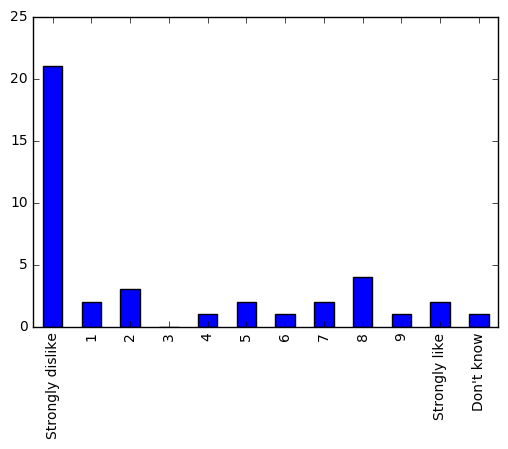

In [90]:
liberal_democats[ liberal_democats["EUIntegrationGreen"]=="Protect our independence" ]["likeUKIP"].value_counts().sort_index().plot('bar')

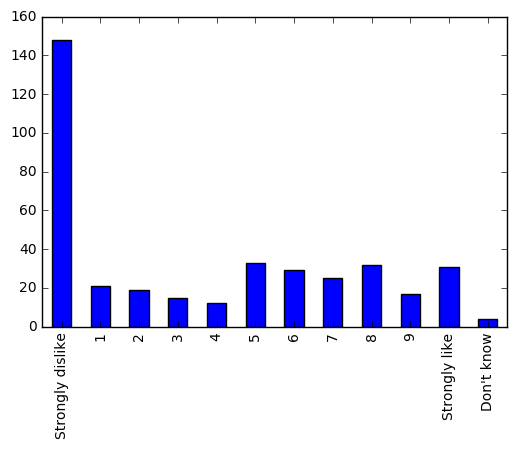

In [91]:
liberal_democats[ liberal_democats["EUIntegrationGreen"]=="Unite fully with the European Union" ]["likeUKIP"].value_counts().sort_index().plot('bar')

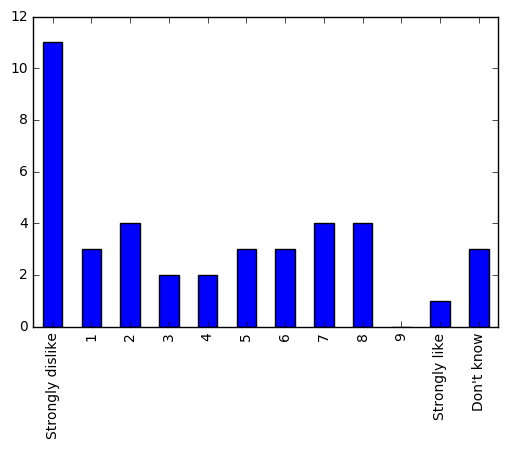

In [92]:
liberal_democats[ liberal_democats["EUIntegrationGreen"]=="Protect our independence" ]["likeGrn"].value_counts().sort_index().plot('bar')

In [100]:
liberal_democats["MII_text"].loc[ld_minus_ukip][liberal_democats['bestOnMII']!="United Kingdom Independence Party (UKIP)"].value_counts()

__NA__                                                         309
EU referendum                                                  231
Immigration                                                    157
EU Referendum                                                  149
Economy                                                        147
immigration                                                    142
economy                                                        121
NHS                                                             91
Brexit                                                          91
eu referendum                                                   67
Europe                                                          66
Housing                                                         60
Inequality                                                      50
The economy                                                     48
EU                                                            